# Diamond Price Prediction Report from the 'Diamond' Dataset


## The aim of this report is to model the price of diamonds given different factors such as carat, dimensions, cut and color

### Starting off by analysing the data

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [67]:
#Import the data set
df = sns.load_dataset('diamonds')
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

## Regression: explaining price with carat

In [68]:
# Select variables 
X = df[['carat']]
y = df['price']

In [69]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [7768.91049036]


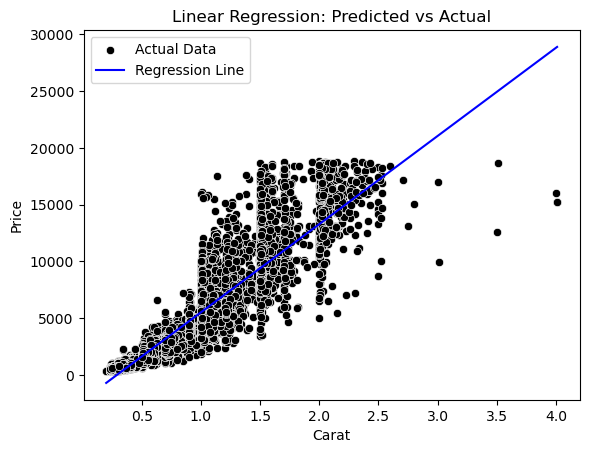

In [71]:
# Scatter plot of the test data
sns.scatterplot(x=X_test['carat'], y=y_test, color="black", label="Actual Data")

# Regression line based on predictions
sns.lineplot(x=X_test['carat'], y=y_pred, color="blue", label="Regression Line")

# Add labels and a title
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Linear Regression: Predicted vs Actual")
plt.legend()

# Show the plot
plt.show()

In [72]:
# Mean Absolute Error
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred) 

# Mean Squared Error
rmse = root_mean_squared_error(y_true = y_test,
                               y_pred = y_pred) 

# Mean Absolute Error %
dumb_mape = mean_absolute_percentage_error(y_true = y_test,
                                           y_pred = y_pred) 

# Rsquared
r2 = r2_score(y_true = y_test, y_pred = y_pred) 

## Regression: explaining price with all numerical variables

In [73]:
#1.Selecting only numeric columns
numeric_cols = df.select_dtypes(include='number')

#2. Selecting predictors and target variable
## In this case considering all the columns
X =numeric_cols.drop(columns='price')  # Drop the target column
y = numeric_cols['price']

#3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#4. Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize numeric variables
    ('regressor', LinearRegression()) 
])

#5. Train the pipeline
pipeline.fit(X_train, y_train)

#6: Make predictions
y_pred = pipeline.predict(X_test)

In [74]:
# Mean Absolute Error
mae_1 = mean_absolute_error(y_true = y_test, y_pred = y_pred) 

# Mean Squared Error
rmse_1 = root_mean_squared_error(y_true = y_test,
                               y_pred = y_pred) 

# Mean Absolute Error %
dumb_mape_1 = mean_absolute_percentage_error(y_true = y_test,
                                           y_pred = y_pred) 

# Rsquared
r2_1 = r2_score(y_true = y_test, y_pred = y_pred) 

## Model evaluation and comparison

In [75]:
# Create a DataFrame for the table
metrics_table = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", 
               "Root Mean Squared Error (RMSE)", 
               "Mean Absolute Percentage Error (MAPE)", 
               "R-squared (R²)"],
    "Carat": [mae, rmse, dumb_mape, r2],
    "Full model": [mae_1, rmse_1, dumb_mape_1, r2_1]
})

# Display the table
metrics_table

Metric        Carat   Full model
0              Mean Absolute Error (MAE)  1009.504742   888.480863
1         Root Mean Squared Error (RMSE)  1549.641460  1497.390699
2  Mean Absolute Percentage Error (MAPE)     0.389251     0.283362
3                         R-squared (R²)     0.848939     0.858954

## Visualising the correlation of the numerical data

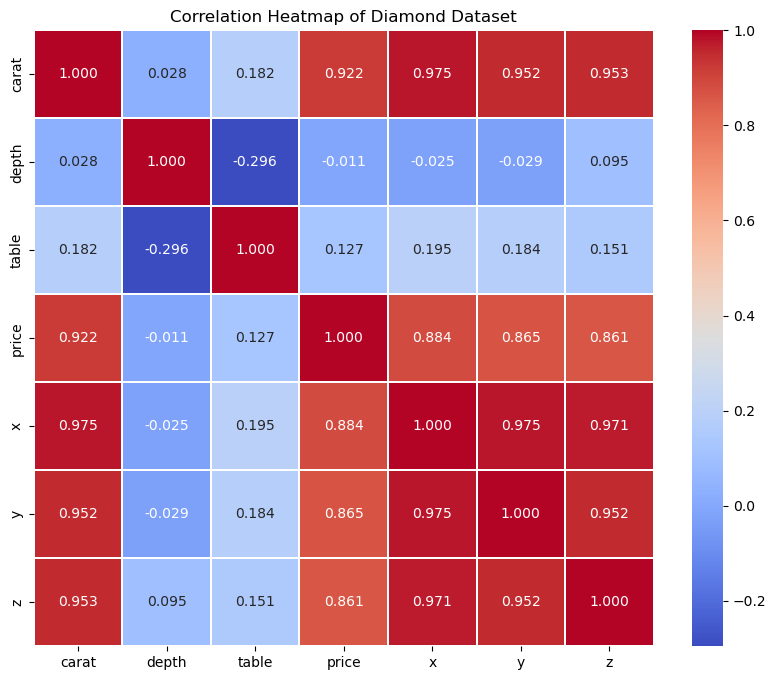

In [76]:
#select only numerical columns from the DataFrame to show correlation
numeric_data = df.select_dtypes(include='number')

#compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.3)
plt.title("Correlation Heatmap of Diamond Dataset")
plt.show()

## High correlation between x,y,z with each other and with price, given that x,y,z are the dimensions of the diamonds

## Plotting the relationship between Carats and the price

Correlation between 'carat' and 'price': 0.92


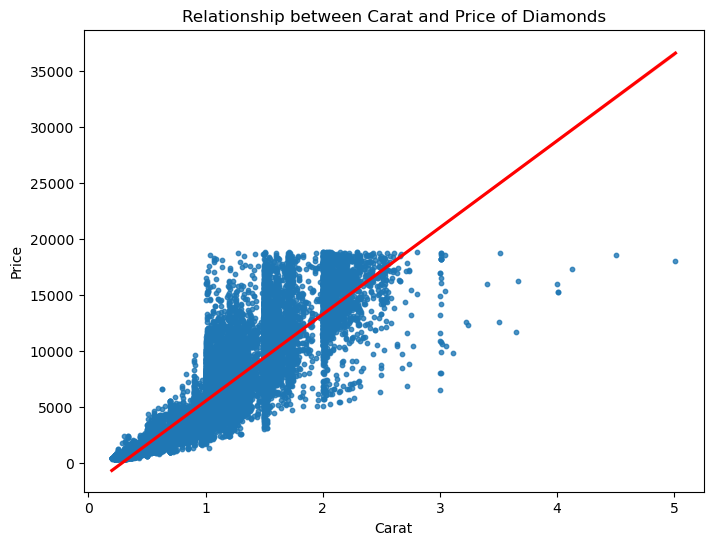

In [77]:
# Step 1: Select only the 'carat' and 'price' columns
df_selected = df[['carat', 'price']]

# Step 2: Compute the correlation between 'carat' and 'price'
correlation = df_selected.corr().iloc[0, 1]
print(f"Correlation between 'carat' and 'price': {correlation:.2f}")

# Step 3: Visualize the relationship between 'carat' and 'price'
plt.figure(figsize=(8, 6))
sns.regplot(x='carat', y='price', data=df_selected, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Relationship between Carat and Price of Diamonds')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

## Accounting for residuals

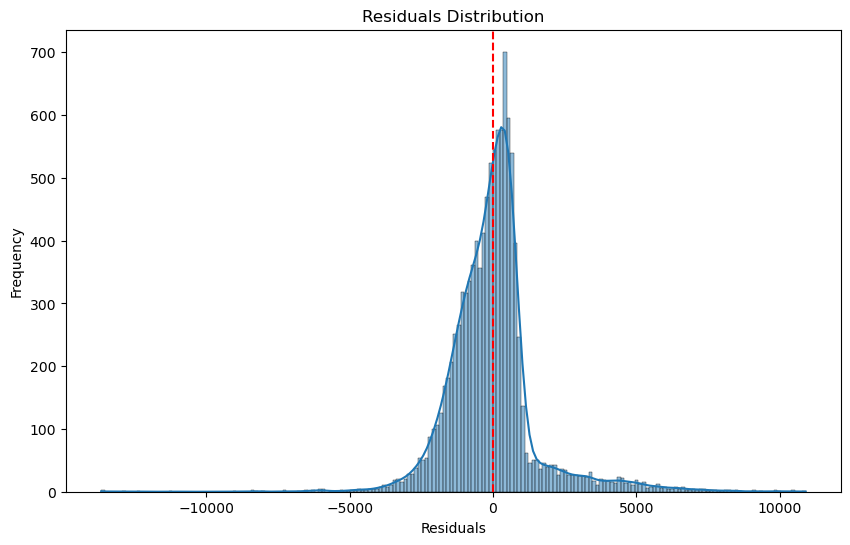

In [87]:
# calculate residuals
residuals = y_test - y_pred

#visualising the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


## Creating and training the dummy regressor, using the 'mean' strategy starting off with only carat as an input

In [78]:
# Prepare the data (only 'carat' and 'price' as features)
#our input, X
X = df[['carat']]
#our target, y
y = df['price']  

# split the data into train test using the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize the Dummy Regressor model (predicting the mean)
dummy_model = DummyRegressor(strategy='mean')

# train the model
dummy_model.fit(X_train, y_train)


# make predictions on the test data
y_pred = dummy_model.predict(X_test)

#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-Squared (R²): {r2}')

Mean Absolute Error (MAE): 3020.5058390529985
Mean Squared Error (MSE): 15897940.683384834
Root Mean Squared Error (RMSE): 3987.2221763258735
R-Squared (R²): -7.04060323410971e-05


C:\Users\pc\anaconda3\envs\ghaithpython\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Numbers shown say that our model is not working properly, now we use pipeline and standard scaler to enhance our model

In [90]:
# split the data into training and testing sets
X = df[['carat']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initiate a pipeline with standard scaler and linear regression
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# train the model
pipeline.fit(X_train, y_train)

# to predict
y_pred = pipeline.predict(X_test)

#evaluation of the model is given by
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-Squared (R²): {r2}')


Mean Absolute Error (MAE): 1009.5047420600907
Mean Squared Error (MSE): 2401388.654479092
Root Mean Squared Error (RMSE): 1549.6414599768207
R-Squared (R²): 0.8489390686155808


C:\Users\pc\anaconda3\envs\ghaithpython\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Results shown are better and more concrete

## Using all numerical data

In [103]:
# droping any non-numeric columns
diamond = df.select_dtypes(include=['float64', 'int64'])

#exclude target column from X
X = diamond.drop('price', axis=1) 
y = diamond['price']  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)


# Make predictions on the test data
predictions = model.predict(X_test_scaled)


print("Predictions on Test Data:")
print(predictions[:10])

#compare actual vs predicted prices
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})
com_df=pd.DataFrame(comparison_df)
com_df.head(10)


Predictions on Test Data:
[  200.79413447  2361.44322401  1051.27692119  1229.92592305
 10035.10505409  5799.9982164   1947.51640143  1752.63109253
  2409.62405859  6644.81725731]


Actual     Predicted
1388      559    200.794134
50052    2201   2361.443224
41645    1238   1051.276921
42377    1304   1229.925923
17244    6901  10035.105054
1608     3011   5799.998216
46398    1765   1947.516401
45493    1679   1752.631093
49385    2102   2409.624059
10460    4789   6644.817257

## Evaluating the model

In [104]:
# calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 2242178.90
Mean Absolute Error (MAE): 888.48
R-squared (R²): 0.86


## Slightly better prediction power after including other numerical data

## Plotting the Acutal vs Predicted Values

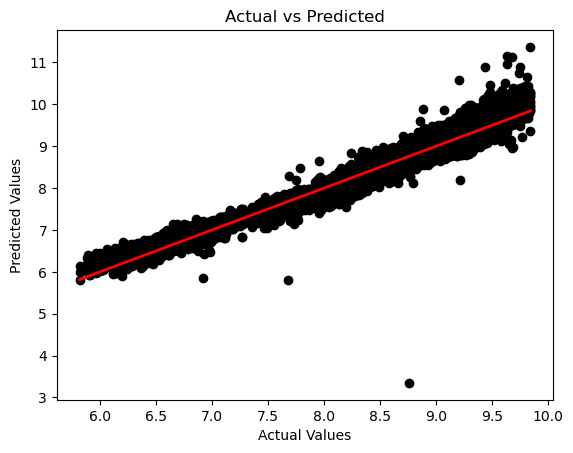

In [50]:
# Plotting Actual vs Predicted values
plt.scatter(y_test, y_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

# Conclusion

## The model showed strong explination for the carat - price relationship
### R-squared result was 85% for price given the carat input
### Slightly better result of 86% for price given other numerical data, that is because the other numerical data are baasically a describtion of the carat


### A normally distributed residual value centered near zero shows the inclusion of almost all importat explanatory values


### The model looks fine given the good scores it got over the differen evaluation methods